In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium import plugins
import ipywidgets
import geocoder
from vega_datasets import data as vds 
from branca.element import Figure

# Data Frame of Airbnb Listings Data

In [332]:
data= pd.read_csv('listings.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,0.30,30,217,4,NaN
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,299,30,9,2018-10-19,0.11,9,356,0,NaN
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,2019-11-12,0.10,6,365,0,NaN
3,45935,Room in Beautiful Townhouse.,204586,L,Bronx,Mott Haven,40.80635,-73.92201,Private room,60,30,0,NaN,NaN,1,83,0,NaN
4,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,2022-07-11,0.95,1,219,4,NaN


#  Manhattan Location Data

In [221]:
Manhattan = folium.Map(
    location=[40.7711329,-73.9741874], zoom_start= 15


)

Manhattan


# Brooklyn Location Data

In [222]:
Brooklyn = folium.Map(
    location=[40.6781784,-73.9441579], zoom_start= 15


)

Brooklyn

# Queens Location Data

In [223]:
Queens = folium.Map(
    location=[40.75,-73.866667], zoom_start= 15


)

Queens

# Bronx Location Data

In [224]:
Bronx = folium.Map(
    location=[40.844782,-73.864827], zoom_start= 15


)

Bronx

# Staten Island Location Data

In [225]:
StatenIsland = folium.Map(
    location=[40.5795317,-74.15020070000003], zoom_start= 15


)

StatenIsland

In [226]:
NewYork = folium.Map(location=[40.689247,-74.044502], zoom_start= 10)

In [227]:
dirman=geocoder.osm('Central Park, Manhattan, NY')
dirbro=geocoder.osm('Brooklyn Mall, Brooklyn, NY')
dirque=geocoder.osm('Queens, Queens, NY')
dirbrx=geocoder.osm('Bronx Zoo, Bronx, NY')
dirsta=geocoder.osm('La Tourette Park, Staten Island, NY')

lat_longman=[dirman.lat,dirman.lng]
lat_longbro=[dirbro.lat,dirbro.lng]
lat_longque=[dirque.lat,dirque.lng]
lat_longbrx=[dirbrx.lat,dirbrx.lng]
lat_longsta=[dirsta.lat,dirsta.lng]

folium.Marker(lat_longman,popup='Manhattan').add_to(NewYork)
folium.Marker(lat_longbro,popup='Brooklyn').add_to(NewYork)
folium.Marker(lat_longque,popup='Queens').add_to(NewYork)
folium.Marker(lat_longbrx,popup='Bronx').add_to(NewYork)
folium.Marker(lat_longsta,popup='Staten Island').add_to(NewYork)

# NYC Neighborhoods

In [228]:
NewYork

In [230]:
for i,j in data[:2].iterrows():
    print(i)
    print(j)

0
id                                               77765
name                              Superior @ Box House
host_id                                         417504
host_name                          The Box House Hotel
neighbourhood_group                           Brooklyn
neighbourhood                               Greenpoint
latitude                                      40.73777
longitude                                    -73.95366
room_type                                   Hotel room
price                                              308
minimum_nights                                       2
number_of_reviews                                   42
last_review                                 2022-07-18
reviews_per_month                                  0.3
calculated_host_listings_count                      30
availability_365                                   217
number_of_reviews_ltm                                4
license                                            NaN
Name: 0,

In [231]:
data.value_counts('neighbourhood_group')


neighbourhood_group
Manhattan        16847
Brooklyn         14845
Queens            6175
Bronx             1568
Staten Island      446
dtype: int64

In [326]:
manint=[dirman.lat,dirman.lng, 16847 ]
broint=[dirbro.lat,dirbro.lng, 14845 ]
queint=[dirque.lat,dirque.lng, 6175]
brxint=[dirbrx.lat,dirbrx.lng, 1568]
staint=[dirsta.lat,dirsta.lng, 446]

neighints=[manint,broint,queint,brxint,staint]
listingdensity=folium.Map(location=[40.689247,-74.044502], zoom_start= 10)

plugins.HeatMap(neighints).add_to(listingdensity)



# Heatmap of Listings Density

In [327]:
listingdensity

# No. of Listings by Neighborhood

Text(0.5, 1.0, 'No. of Listings by Neighborhood Group')

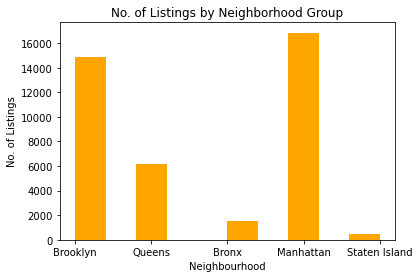

In [323]:
fig=plt.hist(data['neighbourhood_group'], bins =10, color='orange',)
plt.xlabel('Neighbourhood')
plt.ylabel('No. of Listings')
plt.title('No. of Listings by Neighborhood Group')


# Avg. Price by Neighborhood

In [234]:
pivot = pd.pivot_table(data=data, index=['neighbourhood_group'], values=['price']) 
pivot

,price
neighbourhood_group,
Bronx,124.737245
Brooklyn,157.927114
Manhattan,264.933341
Queens,131.365506
Staten Island,143.163677


Text(0.5, 1.0, 'Avg.Price by Neighborhood Group')

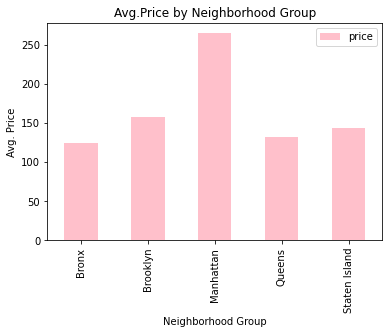

In [321]:
pivot.plot(kind='bar',xlabel = 'Neighborhood Group',ylabel = 'Avg. Price', color='pink')
plt.title('Avg.Price by Neighborhood Group')


# Price Range Concentration

Text(0.5, 1.0, 'BoxPlot of Price Range Concentration')

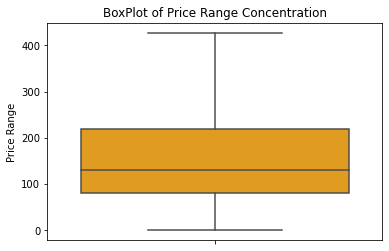

In [318]:
sns.boxplot(data=data, y="price",showfliers=False, hue=['neighbourhood_group'],color='orange')

plt.ylabel('Price Range')
plt.title('BoxPlot of Price Range Concentration')



# Avg. Price by Room Type 

In [242]:
histo= data.pivot_table(index=['room_type'], values=['price'])


In [256]:
histo.sort_values(by='price',ascending=True,)

,price
room_type,
Shared room,119.398564
Private room,122.936495
Entire home/apt,251.546022
Hotel room,371.648515


Text(0.5, 1.0, 'Avg. Price by Type of Listing')

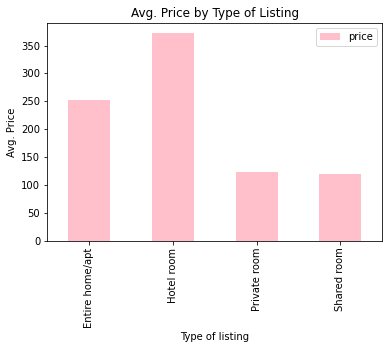

In [258]:
histo.plot.bar(color='pink')
plt.xlabel('Type of listing')
plt.ylabel('Avg. Price')
plt.title('Avg. Price by Type of Listing')


# Price vs No. of Reviews by Room Type 

In [296]:
entirehome= data[data['room_type'] == 'Entire home/apt']
hotelroom=data[data['room_type'] == 'Hotel room']
privateroom=data[data['room_type'] == 'Private room']
sharedroom=data[data['room_type'] == 'Shared room']

Text(0, 0.5, 'No. of Reviews')

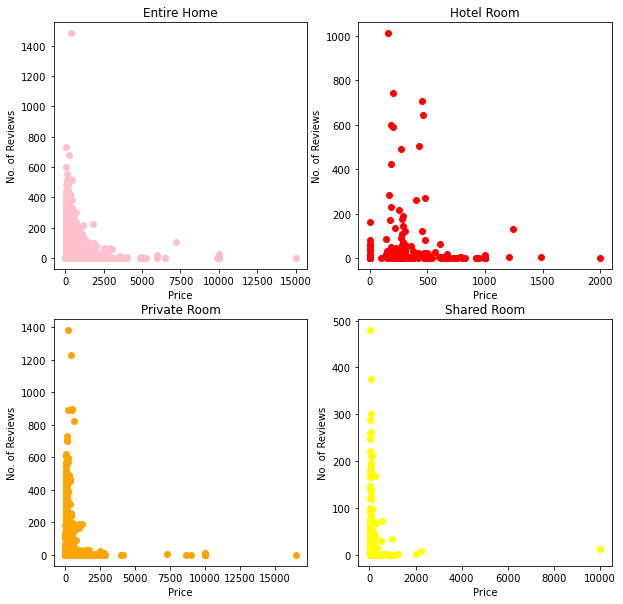

In [324]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.scatter(entirehome['price'], entirehome['number_of_reviews'], c='pink') 
plt.title('Entire Home')
plt.xlabel('Price')
plt.ylabel('No. of Reviews')

plt.subplot(2, 2, 2)
plt.scatter(hotelroom['price'], hotelroom['number_of_reviews'], c='red') 
plt.title('Hotel Room')
plt.xlabel('Price')
plt.ylabel('No. of Reviews')

plt.subplot(2, 2, 3)
plt.scatter(privateroom['price'], privateroom['number_of_reviews'], c='orange') 
plt.title('Private Room')
plt.xlabel('Price')
plt.ylabel('No. of Reviews')

plt.subplot(2, 2, 4)
plt.scatter(sharedroom['price'], sharedroom['number_of_reviews'], c='yellow') 
plt.title('Shared Room')
plt.xlabel('Price')
plt.ylabel('No. of Reviews')

# Is There a Correlation Between Price, Minimum Stay & Availability of Listings?

Text(0.5, 1.0, 'Correlation of Price, Minimum Nights, Avalability')

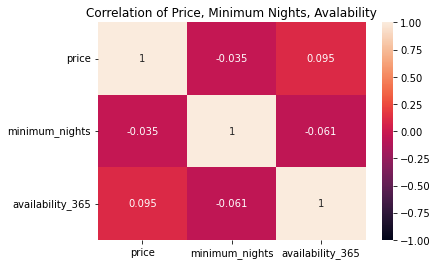

In [237]:
sns.heatmap(data[['price', 'minimum_nights', 'availability_365']].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlation of Price, Minimum Nights, Avalability')
